In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('Inca Tribe House Prices.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Compound        27322 non-null  object 
 8   Payment_Option  27322 non-null  object 
 9   Delivery_Date   27322 non-null  object 
 10  Delivery_Term   27322 non-null  object 
 11  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB


In [4]:
data.Delivery_Term.unique()

array(['Finished', 'Unknown ', 'Core & Shell', 'Not Finished',
       'Semi Finished'], dtype=object)

In [5]:
# normalize all object type columns - lower case and strip whitespace
def normalize_column(col):
    if col.dtype == 'object':
        return col.str.lower().str.strip()
    return col

data = data.apply(normalize_column)

# replace all columns with the value unknown with np.nan
data.replace('unknown', np.nan, inplace=True)
data.replace('unknown payment', np.nan, inplace=True)

In [6]:
# identify missing values
missing_values = data.isnull().sum()
missing_values

Type                  0
Price                 0
Bedrooms            203
Bathrooms           171
Area                471
Furnished          8491
Level             10400
Compound          11032
Payment_Option     3012
Delivery_Date     10072
Delivery_Term      4670
City                  0
dtype: int64

Exploring categorical values

In [7]:
# for object columns count the number of unique values
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    unique_values = data[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: Type, Unique Values: 9
Column: Furnished, Unique Values: 2
Column: Level, Unique Values: 13
Column: Compound, Unique Values: 559
Column: Payment_Option, Unique Values: 3
Column: Delivery_Date, Unique Values: 9
Column: Delivery_Term, Unique Values: 4
Column: City, Unique Values: 179


In [8]:
data.Delivery_Date.unique()

array(['ready to move', 'soon', '2024', 'within 6 months', '2026', nan,
       '2023', '2025', '2022', '2027'], dtype=object)

In [9]:
data.drop(['Compound', 'City', 'Delivery_Date'], axis=1, inplace=True)

In [10]:
data['Type'].value_counts()

Type
apartment            8506
chalet               6593
stand alone villa    4629
town house           3073
twin house           2276
duplex                861
standalone villa      608
penthouse             526
studio                250
Name: count, dtype: int64

In [11]:
data['Type'] = data['Type'].str.lower()
data['Type'].replace({'standalone villa': 'stand alone villa'}, inplace=True)

In [12]:
# group level and type
data.loc[pd.isna(data.Level)==True].groupby(['Type']).size()

Type
chalet                868
duplex                 22
penthouse              27
stand alone villa    4869
studio                 11
town house           2648
twin house           1955
dtype: int64

In [13]:
data.loc[data.Type=='penthouse'].groupby(['Level', 'Type']).size()

Level    Type     
1        penthouse     33
10       penthouse      2
10+      penthouse      2
2        penthouse    122
3        penthouse    142
4        penthouse     81
5        penthouse     34
7        penthouse      1
ground   penthouse     15
highest  penthouse     67
dtype: int64

In [14]:
data.groupby(['Delivery_Term'])['Price'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Delivery_Term,,,,,,,,
not finished,1852.0,5.992371e+06,6.458882e+06,50000.0,1697500.0,4500000.0,7800000.0,69000000.0
core & shell,931.0,5.983077e+06,6.615045e+06,30000.0,2250000.0,4000000.0,7300000.0,70000000.0
semi finished,5495.0,5.115295e+06,6.063764e+06,30000.0,1480000.0,3200000.0,6672272.0,100000000.0
finished,14374.0,4.593914e+06,7.090669e+06,30000.0,1000000.0,2600000.0,5200000.0,240000000.0


In [15]:
data.loc[pd.isna(data.Delivery_Term)==True].groupby(['Type']).size().sort_values(ascending=False)

Type
apartment            1421
stand alone villa    1065
chalet                869
town house            712
twin house            395
duplex                114
penthouse              59
studio                 35
dtype: int64

In [16]:
data.groupby('Type')['Delivery_Term'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

Type
apartment            finished
chalet               finished
duplex               finished
penthouse            finished
stand alone villa    finished
studio               finished
town house           finished
twin house           finished
Name: Delivery_Term, dtype: object

In [17]:
data.groupby(['Payment_Option'])['Price'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Payment_Option,,,,,,,,
cash,9573.0,6.919202e+06,8.853694e+06,30000.0,1700000.0,4000000.0,9000000.0,240000000.0
installment,3897.0,4.162045e+06,5.414211e+06,74000.0,1700000.0,3000000.0,5139000.0,205000000.0
cash or installment,10840.0,3.087608e+06,3.999324e+06,30000.0,600000.0,1995420.0,4100000.0,75000000.0


In [18]:
data.loc[data.Type=='penthouse'].groupby(['Level'])['Price'].describe().sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Level,,,,,,,,
highest,67.0,3.599196e+06,3.077885e+06,525000.0,2234000.0,3300000.0,4120000.0,25000000.0
1,33.0,5.190333e+06,3.523356e+06,1200000.0,2990000.0,4300000.0,6500000.0,19500000.0
4,81.0,3.443433e+06,2.363981e+06,280000.0,1650000.0,3300000.0,4500000.0,14357745.0
ground,15.0,4.613687e+06,3.452624e+06,430000.0,2582500.0,3800000.0,6540000.0,13000000.0
2,122.0,2.989612e+06,1.860847e+06,125000.0,2117500.0,2859739.5,3500000.0,12500000.0
3,142.0,3.665570e+06,2.138271e+06,225000.0,2281000.0,3400000.0,4556000.0,10718400.0
5,34.0,2.948453e+06,2.090246e+06,320000.0,1641000.0,2575000.0,4113750.0,8650000.0
10,2.0,5.650000e+06,2.050610e+06,4200000.0,4925000.0,5650000.0,6375000.0,7100000.0
7,1.0,5.085000e+06,NaN,5085000.0,5085000.0,5085000.0,5085000.0,5085000.0


In [19]:
data.loc[data.Type=='stand alone villa'].groupby(['Level', 'Type']).size()

Level    Type             
1        stand alone villa     11
2        stand alone villa     22
3        stand alone villa      4
ground   stand alone villa    330
highest  stand alone villa      1
dtype: int64

In [20]:
data.loc[data.Type=='town house'].groupby(['Level', 'Type']).size()

Level   Type      
1       town house     26
2       town house     10
3       town house      2
4       town house      1
7       town house      1
ground  town house    385
dtype: int64

In [21]:
data.loc[data.Type=='twin house'].groupby(['Level', 'Type']).size()

Level   Type      
1       twin house     10
2       twin house     12
4       twin house      1
ground  twin house    298
dtype: int64

In [22]:
data.loc[data['Type'] == 'chalet', 'Level'].mode().to_list()[0]

'1'

In [23]:
modal_levels_by_type = {}
for Type in data['Type'].unique():
    modal_levels_by_type[Type] = data.loc[data['Type'] == Type, 'Level'].mode().to_list()[0]
    
modal_levels_by_type

{'chalet': '1',
 'apartment': '2',
 'stand alone villa': 'ground',
 'studio': 'ground',
 'twin house': 'ground',
 'town house': 'ground',
 'duplex': 'ground',
 'penthouse': '3'}

In [24]:
# identify missing values
missing_values = data.isnull().sum()
missing_values

Type                  0
Price                 0
Bedrooms            203
Bathrooms           171
Area                471
Furnished          8491
Level             10400
Payment_Option     3012
Delivery_Term      4670
dtype: int64

In [25]:
# evaluate proportion of missing values to total
missing_proportion = missing_values / len(data)
missing_proportion = missing_proportion[missing_proportion > 0]
missing_proportion = missing_proportion.sort_values(ascending=False)
missing_proportion

Level             0.380646
Furnished         0.310775
Delivery_Term     0.170925
Payment_Option    0.110241
Area              0.017239
Bedrooms          0.007430
Bathrooms         0.006259
dtype: float64

In [26]:
for column in missing_proportion.index:
    if missing_proportion[column] > 0.4:
        # drop columns with more than 40% missing values
        print(f"Dropping column: {column} with {missing_proportion[column]:.2%} missing values")
        data.drop(columns=[column], inplace=True)
    elif missing_proportion[column] > 0.2 and data[column].dtype == 'object':
        # use unknown for categorical columns with more than 20% missing values
        data[column].fillna('unknown', inplace=True)
    else:
        # Fill missing values with the mean for numerical columns
        if data[column].dtype in [np.float64, np.int64]:
            data[column].fillna(data[column].mean(), inplace=True)
        # Fill missing values with the mode for categorical columns
        elif data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)

In [27]:
# rounding values where it does not make sense to have decimals
data['Bathrooms']= data['Bathrooms'].round()
data['Bedrooms']= data['Bedrooms'].round()

In [28]:
data.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Payment_Option    0
Delivery_Term     0
dtype: int64

In [29]:
# for object columns count the number of unique values
object_columns = data.select_dtypes(include=['object']).columns
for column in object_columns:
    unique_values = data[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Column: Type, Unique Values: 8
Column: Furnished, Unique Values: 3
Column: Level, Unique Values: 14
Column: Payment_Option, Unique Values: 3
Column: Delivery_Term, Unique Values: 4


In [30]:
data.Level.unique()

array(['unknown', '4', 'ground', '3', '2', '1', '9', '6', '10+', '7', '8',
       '10', '5', 'highest'], dtype=object)

In [31]:
# Group level values of 1 - 3 as low floor, 4 - 7 as mid floor and 8 - 10+ as high floor
def categorize_level(level):
    level = level.replace('+', '')
    if level.isdigit():
        level = int(level)
    else:
        return level
    
    if level in [1, 2, 3]:
        return 'low floor'
    elif level in [4, 5, 6, 7]:
        return 'mid floor'
    else:
        return 'high floor'

In [32]:
data['Level'] = data['Level'].apply(categorize_level)

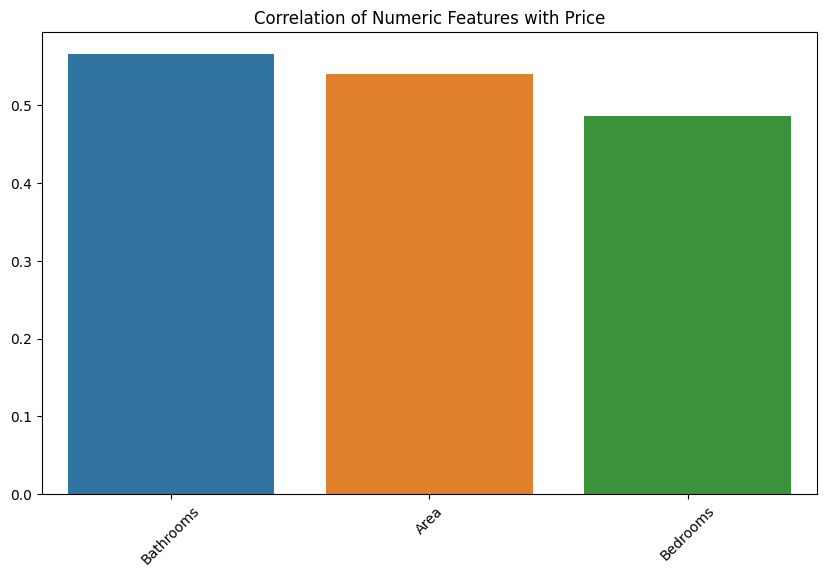

In [70]:
# show a bar chart for the numeric correlation with price
def plot_numeric_correlation(data, target_column):
    numeric_data = data.select_dtypes(include=[np.number])
    correlation = numeric_data.corr()[target_column].sort_values(ascending=False)
    # drop price
    correlation = correlation.drop(target_column)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation.index, y=correlation.values)
    plt.title(f'Correlation of Numeric Features with {target_column}')
    plt.xticks(rotation=45)
    plt.show()

plot_numeric_correlation(data, 'Price')

{'Type': 0.30993973547837933, 'Furnished': 0.00910766228302775, 'Level': 0.18600640072845415, 'Payment_Option': 0.056096006311026826, 'Delivery_Term': 0.005105777701848285}


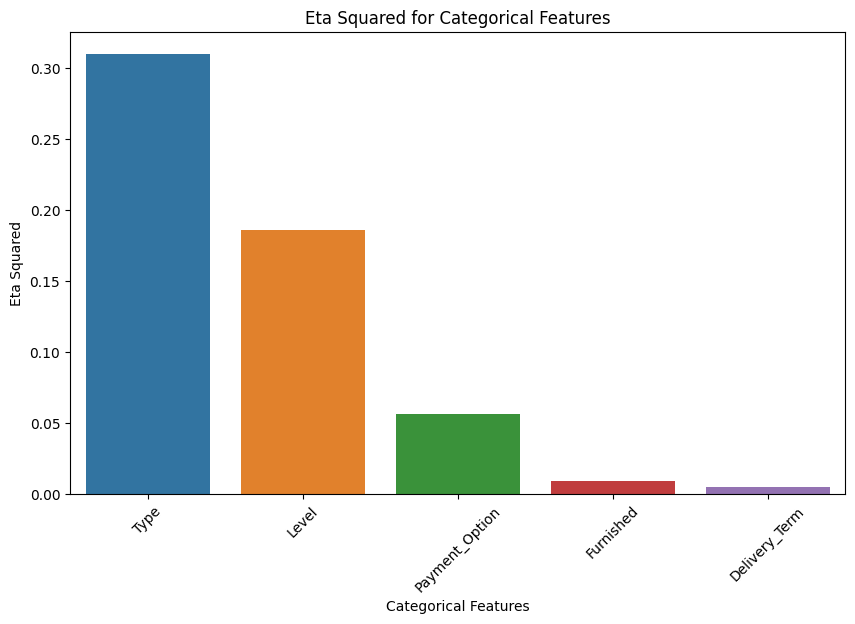

In [74]:
def eta_squared(data, categorical_col, target_col):
    groups = data.groupby(categorical_col)[target_col]
    grand_mean = data[target_col].mean()
    ss_between = sum([len(group) * (group.mean() - grand_mean) ** 2 for name, group in groups])
    ss_total = ((data[target_col] - grand_mean) ** 2).sum()
    return ss_between / ss_total if ss_total != 0 else np.nan

# Example usage for all object columns except the target
eta_sq_results = {}
for col in object_columns:
    if col != 'Price':
        eta_sq_results[col] = eta_squared(data, col, 'Price')

print(eta_sq_results)

# Plotting the eta squared results
def plot_eta_squared(eta_sq_results):
    sorted_eta_sq = dict(sorted(eta_sq_results.items(), key=lambda item: item[1], reverse=True))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(sorted_eta_sq.keys()), y=list(sorted_eta_sq.values()))
    plt.title('Eta Squared for Categorical Features')
    plt.xlabel('Categorical Features')
    plt.ylabel('Eta Squared')
    plt.xticks(rotation=45)
    plt.show()

plot_eta_squared(eta_sq_results)

Removing Outliers

Text(0.5, 0, 'Type')

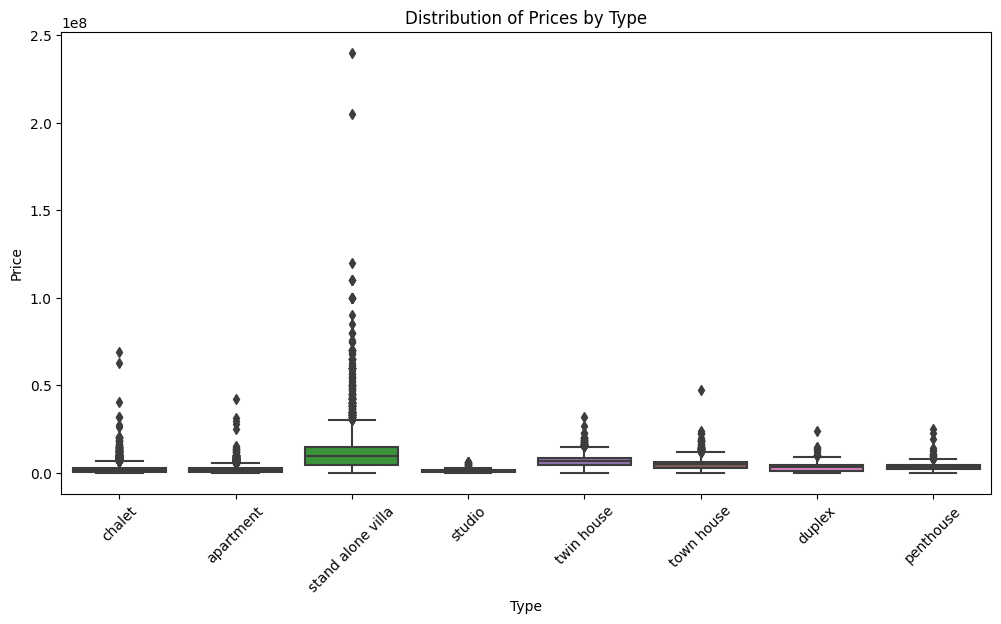

In [34]:
# create a box plot to visualize the distribution of prices by type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Prices by Type')
plt.xlabel('Type')

<Axes: xlabel='Type', ylabel='Price'>

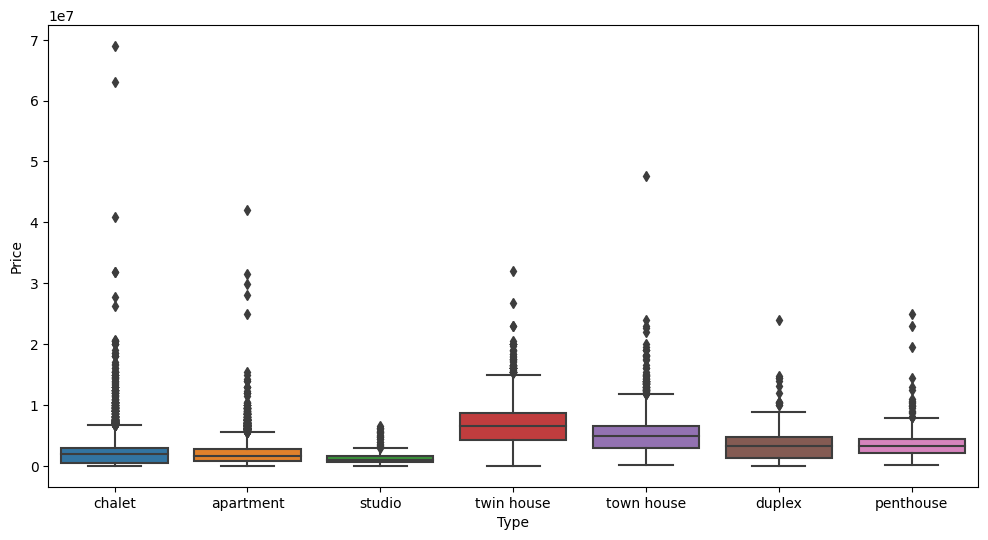

In [35]:
# remove villa from the type and display the plot again

data_filtered = data.loc[data['Type'] != 'stand alone villa']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=data_filtered)

In [36]:
# Remove outliers using IQR method - however iterating through each Type
outliers_removed = data.copy()
indices_to_remove = []
for Type in data['Type'].unique():
    Q1 = data.loc[data.Type==Type]['Price'].quantile(0.25)
    Q3 = data.loc[data.Type==Type]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    type_indices_to_remove = data[(data['Type'] == Type) & ((data['Price'] < lower_bound) | (data['Price'] > upper_bound))].index
    outliers_removed.drop(type_indices_to_remove, inplace=True)
    indices_to_remove.extend(list(type_indices_to_remove))


print(f"Records before removal: {len(data)}"
      f"\nRecords after removal: {len(outliers_removed)}")

Records before removal: 27322
Records after removal: 26360


Text(0.5, 0, 'Type')

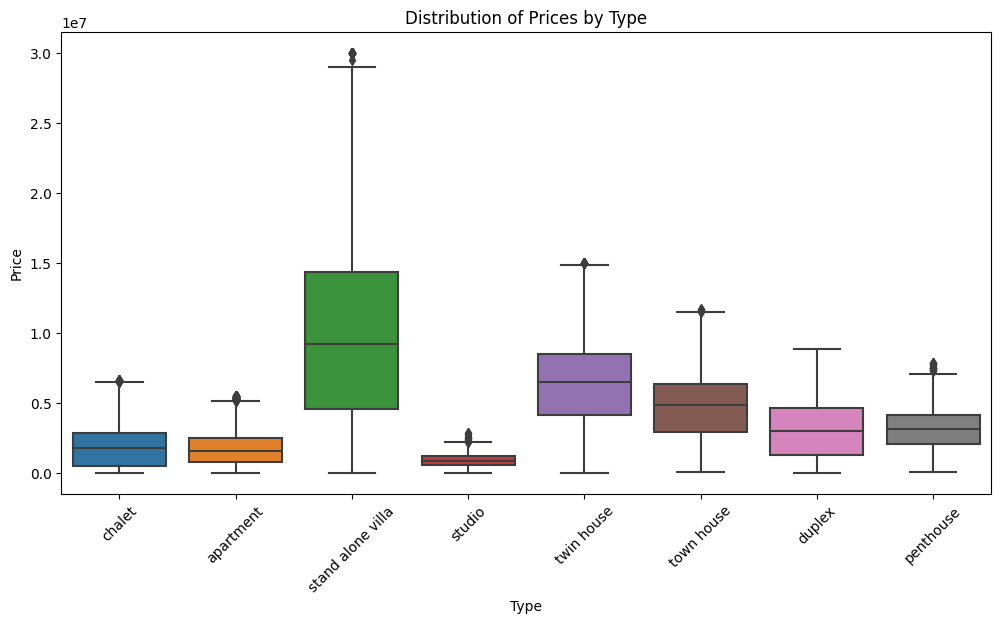

In [37]:
# create a box plot to visualize the distribution of prices by type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=outliers_removed)
plt.xticks(rotation=45)
plt.title('Distribution of Prices by Type')
plt.xlabel('Type')

Text(0.5, 1.0, 'Distribution of Prices by Level')

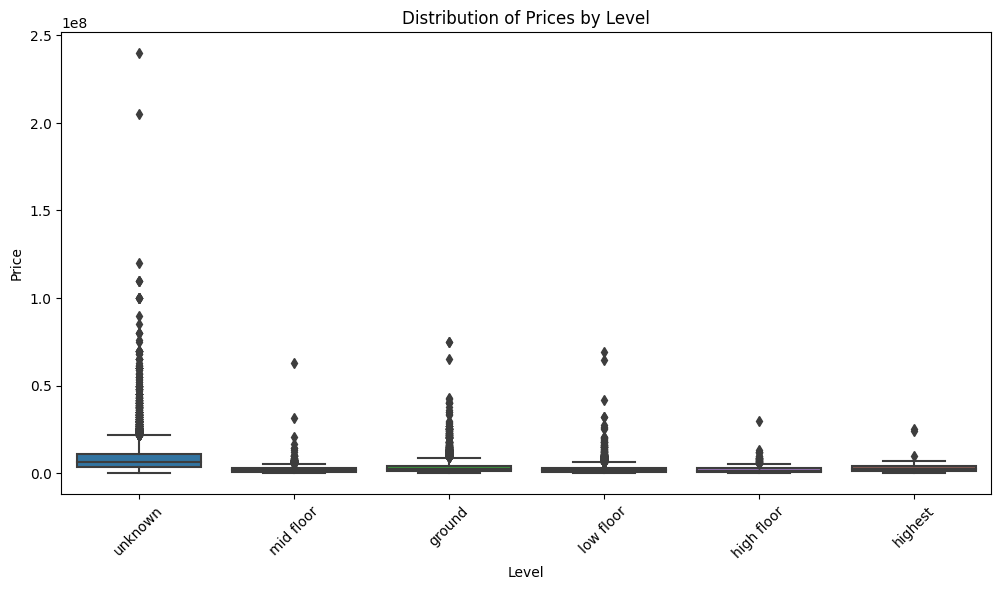

In [38]:
# find correlation between level and price

plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Price', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Prices by Level')

In [39]:
# Remove outliers using IQR method - however iterating through each Type
outliers_removed = data.copy()
indices_to_remove = []
for level in data['Level'].unique():
    Q1 = data.loc[data.Level==level]['Price'].quantile(0.25)
    Q3 = data.loc[data.Level==level]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    level_indices_to_remove = data[(data['Level'] == level) & ((data['Price'] < lower_bound) | (data['Price'] > upper_bound))].index
    outliers_removed.drop(level_indices_to_remove, inplace=True)
    indices_to_remove.extend(list(level_indices_to_remove))


print(f"Records before removal: {len(data)}"
      f"\nRecords after removal: {len(outliers_removed)}")

Records before removal: 27322
Records after removal: 25954


Text(0.5, 1.0, 'Distribution of Prices by Level')

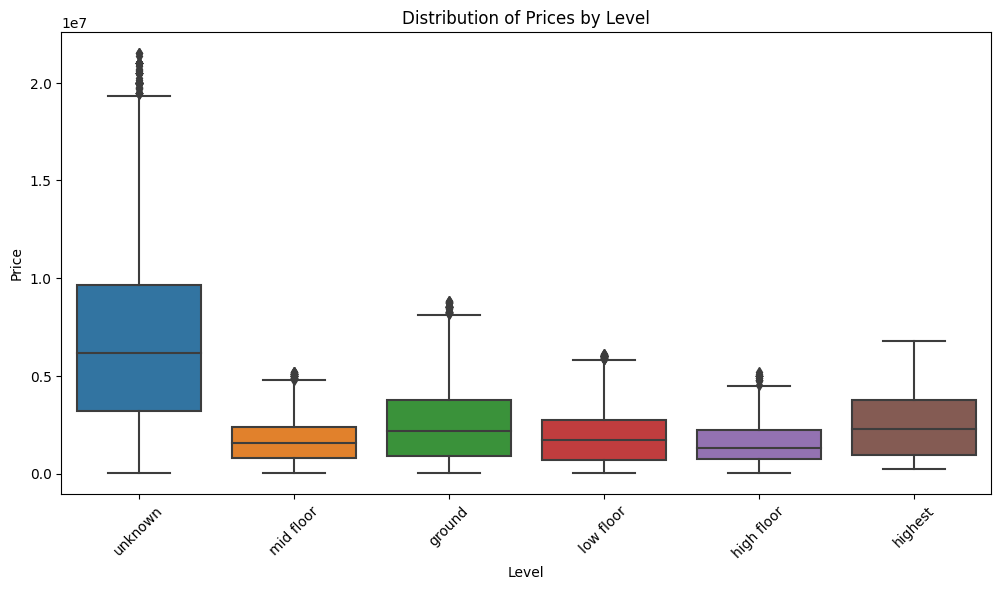

In [40]:
# find correlation between level and price

plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Price', data=outliers_removed)
plt.xticks(rotation=45)
plt.title('Distribution of Prices by Level')

In [41]:
# Union type_indices_to_remove and level_indices_to_remove, ensure unique indices, and drop from DataFrame
indices_to_remove = list(set(indices_to_remove))
outliers_removed = data.drop(indices_to_remove)
print(f"Records before removal: {len(data)}"
        f"\nRecords after removal: {len(outliers_removed)}")


Records before removal: 27322
Records after removal: 25954


Column: Bedrooms, Skewness: 1.0811032096543691


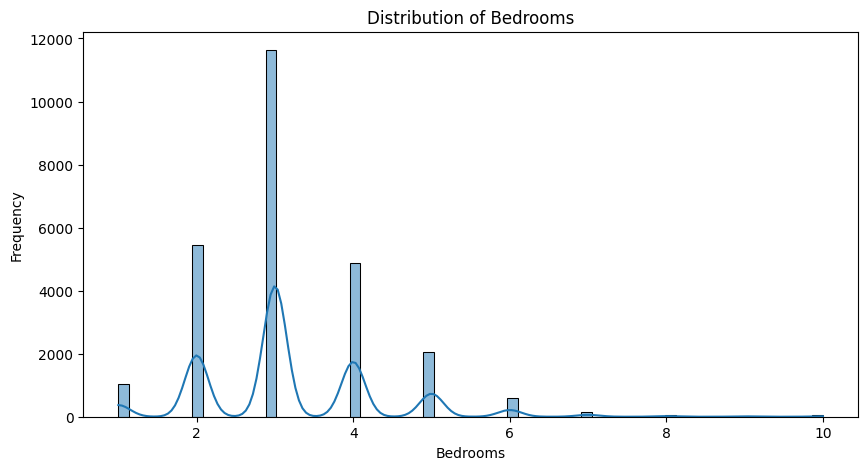

Column: Bathrooms, Skewness: 1.0539749751300613


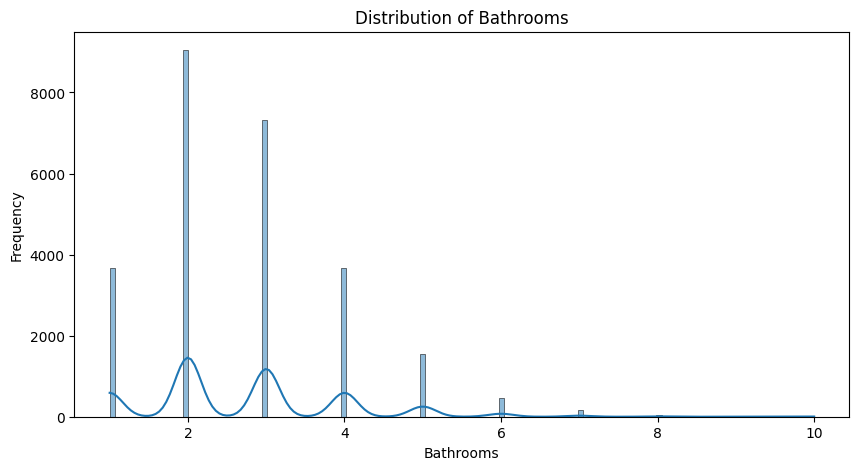

Column: Area, Skewness: 1.9699170771997334


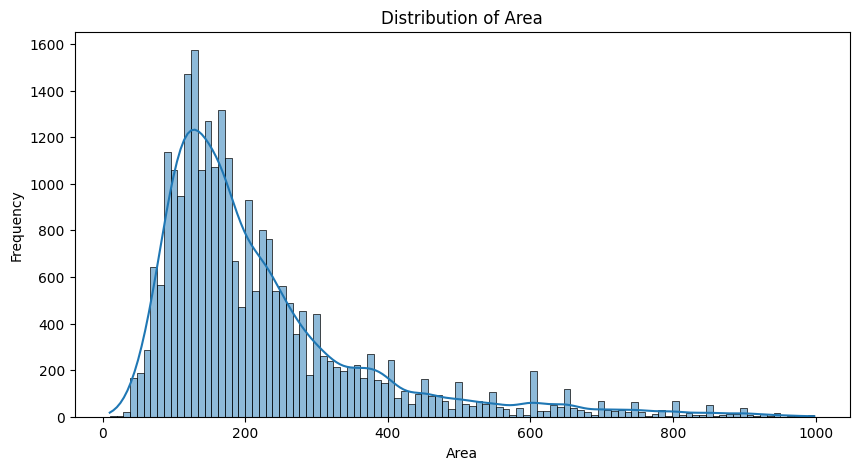

In [42]:
# show the skew and distribution of each numverc column except price
numeric_columns = outliers_removed.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    if column != 'Price':
        print(f"Column: {column}, Skewness: {outliers_removed[column].skew()}")
        plt.figure(figsize=(10, 5))
        sns.histplot(outliers_removed[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# Reset index to ensure proper alignment
outliers_removed_reset = outliers_removed.reset_index(drop=True)

columns_to_scale = ['Bedrooms', 'Bathrooms', 'Area']
numeric_data = outliers_removed_reset.loc[:,columns_to_scale].copy()

# encode categorical columns using one hot encoding
encoded_data = outliers_removed_reset.loc[:,['Type', 'Level']]
# encode data
encoded_data = pd.get_dummies(encoded_data).astype(int)

# concatenate the encoded data with the original data
preprocessed_data = pd.concat([numeric_data, encoded_data], axis=1, sort=False)
preprocessed_data['Price'] = outliers_removed_reset['Price']

Evaluating feature correlation matrix post encoding

Text(0.5, 1.0, 'Feature Correlation Matrix')

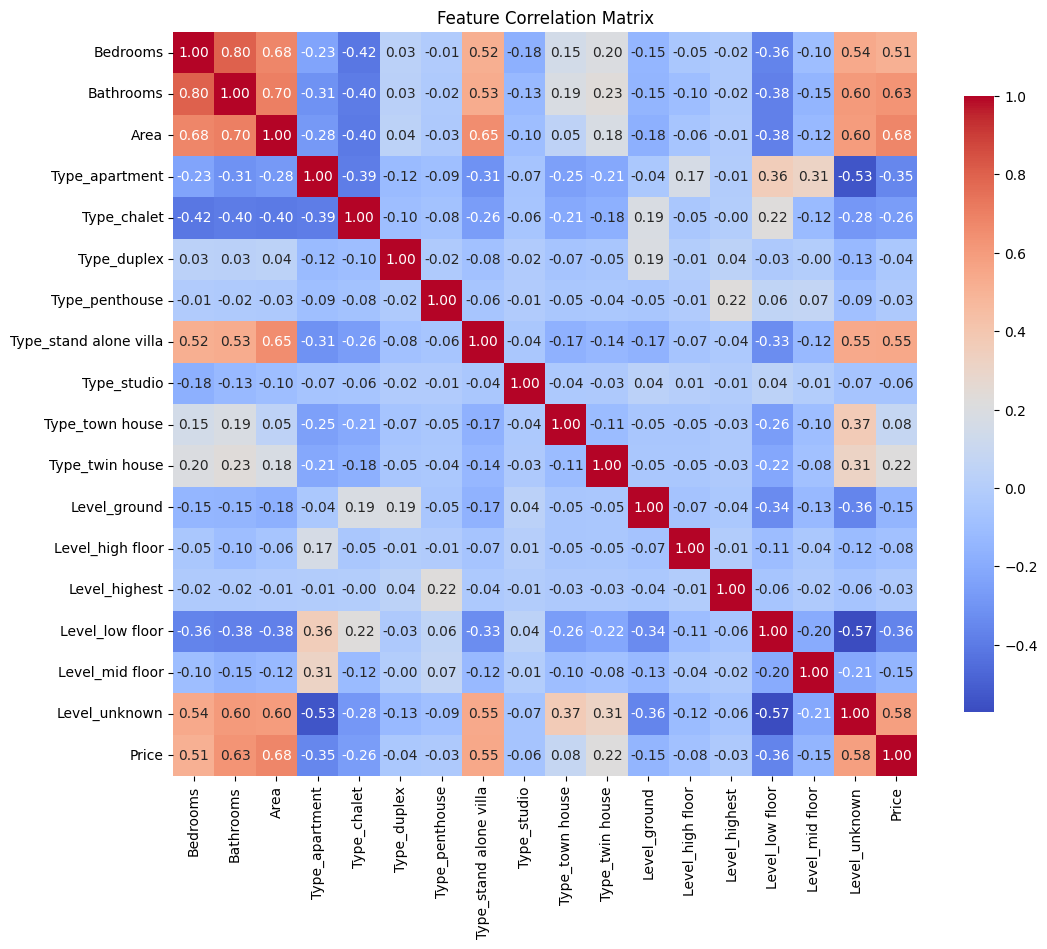

In [59]:
# show feature correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = preprocessed_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')

Model training

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = preprocessed_data.drop('Price', axis=1)
y = preprocessed_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit minmax scaler to the numeric data in train
scaler.fit(X_train[columns_to_scale])
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])
# now scale the test data using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

model = LinearRegression()

model.fit(X_train, y_train)

# evaluate the model

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7098101358597.091
R^2 Score: 0.5474690275699213


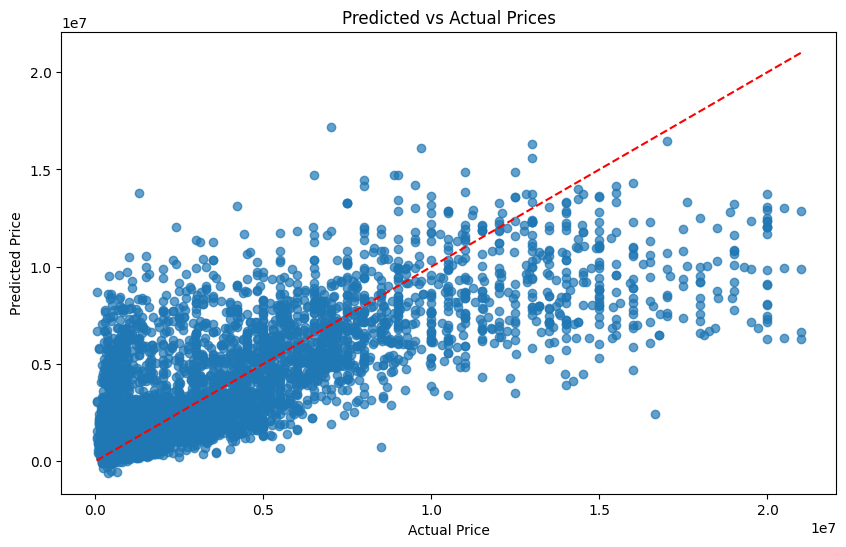

In [63]:
# plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()

Huber Mean Squared Error: 7566417745741.42
Huber R^2 Score: 0.5176120757777802


Text(0.5, 1.0, 'Huber Predicted vs Actual Prices')

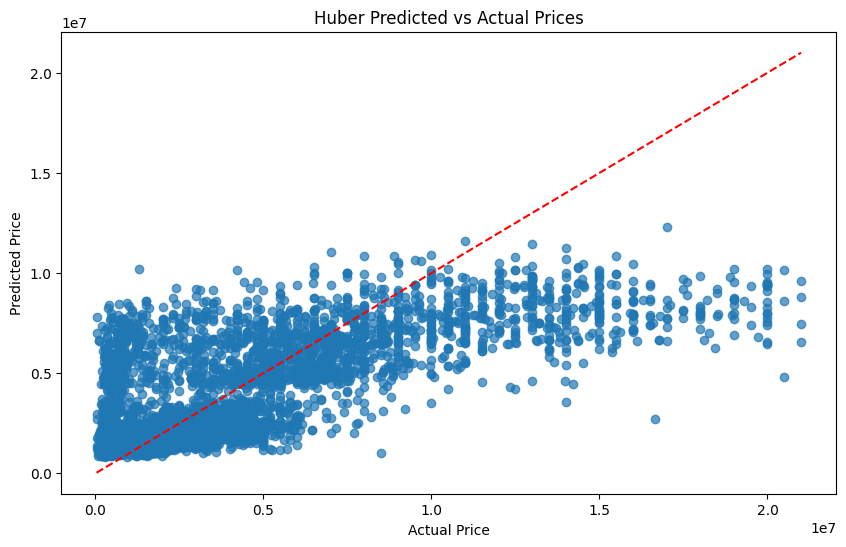

In [64]:
# use huber regression to fit the model
from sklearn.linear_model import HuberRegressor

huber_model = HuberRegressor()

huber_model.fit(X_train, y_train)
# evaluate the model
y_pred = huber_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Huber Mean Squared Error: {mse}")
print(f"Huber R^2 Score: {r2}")
# plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Huber Predicted vs Actual Prices')

Ridge Mean Squared Error: 7091992171218.04
Ridge R^2 Score: 0.5478585115129831


Text(0.5, 0, 'Actual Price')

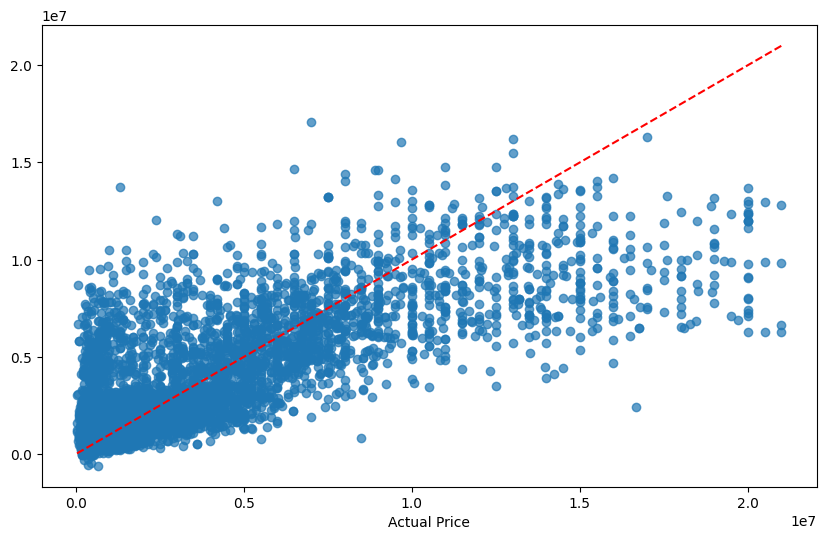

In [65]:
# try ridge regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
# evaluate the model

y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Ridge Mean Squared Error: {mse}")
print(f"Ridge R^2 Score: {r2}")
# plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')

Random Forest Mean Squared Error: 6943703316646.633
Random Forest R^2 Score: 0.5573124902841464


Text(0.5, 1.0, 'Random Forest Predicted vs Actual Prices')

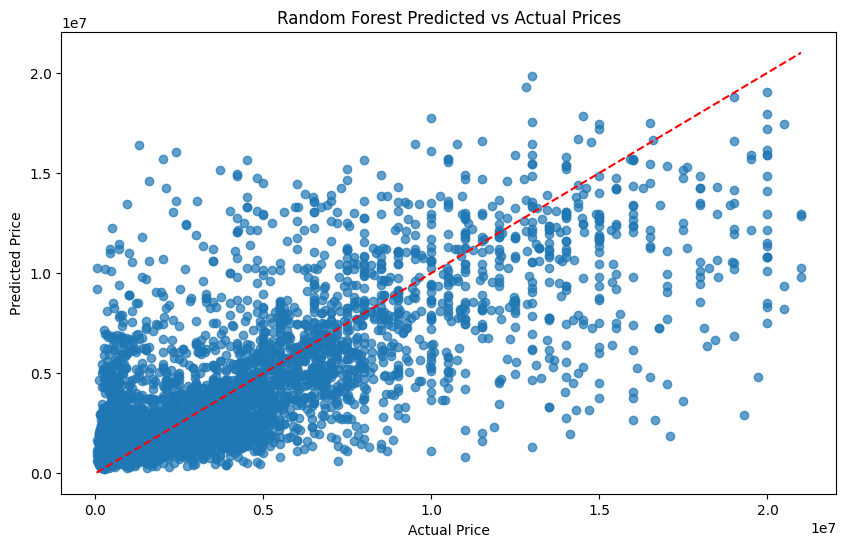

In [66]:
# try random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest R^2 Score: {r2}")
# plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Predicted vs Actual Prices')

In [67]:
# create a summary of the models
model_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Huber Regression', 
              'Ridge Regression', 'Random Forest'],
    'MSE': [ mean_squared_error(y_test, model.predict(X_test)), 
            mean_squared_error(y_test, huber_model.predict(X_test)), 
            mean_squared_error(y_test, ridge_model.predict(X_test)), 
            mean_squared_error(y_test, rf_model.predict(X_test))],
    'R^2': [r2_score(y_test, model.predict(X_test)), 
            r2_score(y_test, huber_model.predict(X_test)), 
            r2_score(y_test, ridge_model.predict(X_test)),
            r2_score(y_test, rf_model.predict(X_test))]
})

print("\nModel Summary:")
print(model_summary)


Model Summary:
               Model           MSE       R^2
0  Linear Regression  7.098101e+12  0.547469
1   Huber Regression  7.566418e+12  0.517612
2   Ridge Regression  7.091992e+12  0.547859
3      Random Forest  6.943703e+12  0.557312
